# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

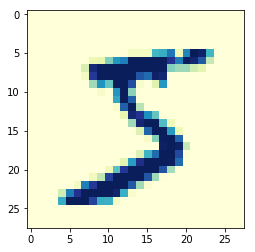

In [5]:
plt.imshow(X_train[0], cmap='YlGnBu')

In [6]:
y_train[0]

5

## Preprocessing the image data

### Preprocessing the training data

In [7]:
image_height, image_width = 28, 28

In [8]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
# make into float numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# hot encoding from 0 to 1
X_train /= 255.0
X_test /= 255.0

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### Preprocessing the test data

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
'''
we actually want the last layer to be one 
where we can send out the result, 
or output, into one of 10 bins, 
representing the digits zero to nine.
'''
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

![neural_net](images/neural-net.png)

In [13]:
model = Sequential()

In [14]:
# first layer
model.add(Dense(512, activation='relu', input_shape=(784,)))

#second layer
model.add(Dense(512, activation='relu'))

# third layer
model.add(Dense(10, activation='softmax'))

## Compile the model

In [15]:
model.compile(optimizer='adam',                 # adam is the got-to optimizer in general
              loss='categorical_crossentropy',  # 10 classes/bins. this function allows for that
              metrics=['accuracy']              # accuracy
             )

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
# number of param calculation for 1st layer
'''
784 pixels and I multiply that by 
512 because it's terminating into 512 nodes
add the bias which is 512
'''
784 * 512 + 512

401920

In [18]:
# number of param calculation for 2nd layer
512 * 512 + 512

262656

In [19]:
# number of param calculation for 3rd layer
512 * 10 + 10

5130

## Recording perfomance for TensorBoard

In [20]:
from keras.callbacks import TensorBoard

In [21]:
tboard = TensorBoard(log_dir='./output', 
                     histogram_freq=5, 
                     write_graph=True, 
                     write_images=True
                    )

## Train the model

In [22]:
history = model.fit(X_train, y_train, 
                    epochs=8, 
                    validation_data=(X_test, y_test),
                    validation_split=1/6, 
                    callbacks=[tboard]
                   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 32s 535us/step - loss: 0.1843 - acc: 0.9430 - val_loss: 0.0758 - val_acc: 0.9767
Epoch 2/8
60000/60000 [==============================] - 22s 363us/step - loss: 0.0779 - acc: 0.9756 - val_loss: 0.0755 - val_acc: 0.9771
Epoch 3/8
60000/60000 [==============================] - 22s 371us/step - loss: 0.0567 - acc: 0.9820 - val_loss: 0.0792 - val_acc: 0.9776
Epoch 4/8
60000/60000 [==============================] - 20s 331us/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.0796 - val_acc: 0.9768
Epoch 5/8
60000/60000 [==============================] - 20s 329us/step - loss: 0.0337 - acc: 0.9886 - val_loss: 0.0802 - val_acc: 0.9780
Epoch 6/8
60000/60000 [==============================] - 20s 329us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0811 - val_acc: 0.9822
Epoch 7/8
60000/60000 [==============================] - 20s 326us/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0998 - 

## What is the accuracy of the model?

### Plot the accuracy of the training model

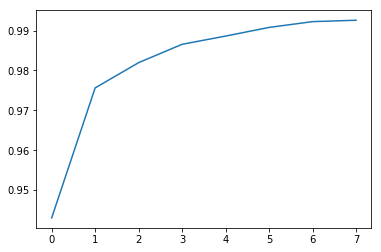

In [23]:
# accuracy tends to 99%
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

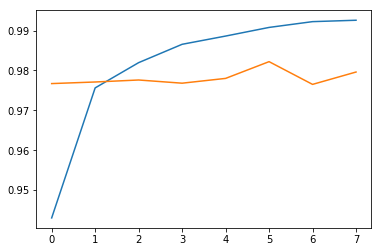

In [24]:
plt.plot(history.history['acc'])      # accuracy of training set
plt.plot(history.history['val_acc'])  # accuracy of testing set

### Accuracy of training and validation with loss

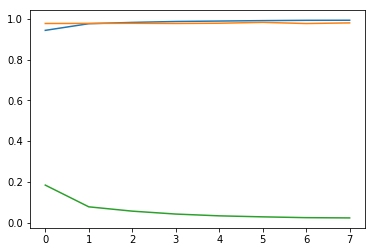

In [25]:
plt.plot(history.history['acc'])      
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])     # loss score


## Evaluating the model

In [26]:
'''
expected shapes:
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
'''

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [27]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 51us/step


In [28]:
score

[0.09313614282929265, 0.9796]

# Convolution Neural Network

## Import the libraries

In [29]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [32]:
batch_size = 128
num_classes = 10

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [34]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total para

In [35]:
history_cnn = cnn.fit(X_train, y_train, 
                      epochs=8, 
                      verbose=1, 
                      validation_data=(X_train,y_train)
                     )

Train on 60000 samples, validate on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1534 - acc: 0.9523 - val_loss: 0.0487 - val_acc: 0.9851
Epoch 2/8
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0313 - val_acc: 0.9907
Epoch 3/8
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0335 - acc: 0.9892 - val_loss: 0.0271 - val_acc: 0.9915
Epoch 4/8
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0155 - val_acc: 0.9953
Epoch 5/8
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0141 - val_acc: 0.9959
Epoch 6/8
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0151 - acc: 0.9953 - val_loss: 0.0091 - val_acc: 0.9972
Epoch 7/8
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0115 - acc: 0.9962 - val_loss: 0.0063 - val_acc: 0.997

Recall that when using neural networks we got good accuracy.

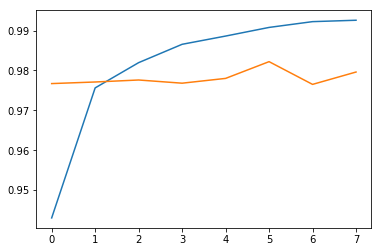

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [1]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')


NameError: name 'plt' is not defined

## Visualising the model

In [23]:
# Save to image

#from keras.utils import plot_model
#plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='LR')

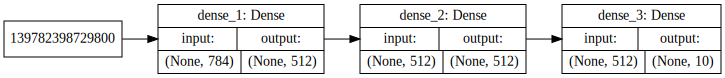

In [30]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='LR').create(prog='dot', format='svg'))

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 41s 912us/step - loss: 0.1994 - acc: 0.9385 - val_loss: 0.1600 - val_acc: 0.9517
Epoch 2/5
45000/45000 [==============================] - 41s 915us/step - loss: 0.0914 - acc: 0.9713 - val_loss: 0.1246 - val_acc: 0.9640
Epoch 3/5
45000/45000 [==============================] - 45s 1ms/step - loss: 0.0652 - acc: 0.9798 - val_loss: 0.1047 - val_acc: 0.9713
Epoch 4/5
45000/45000 [==============================] - 45s 992us/step - loss: 0.0521 - acc: 0.9838 - val_loss: 0.1209 - val_acc: 0.9709
Epoch 5/5
45000/45000 [==============================] - 46s 1ms/step - loss: 0.0407 - acc: 0.9877 - val_loss: 0.1098 - val_acc: 0.9741


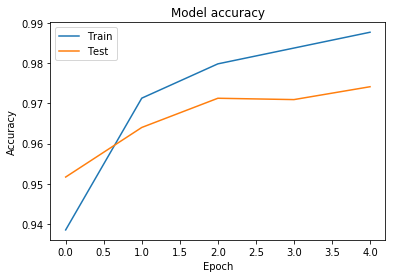

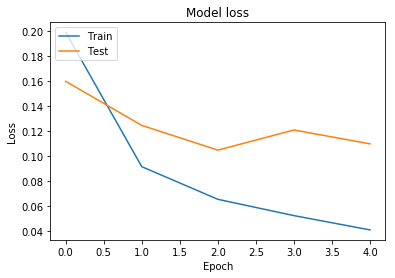

In [26]:
import matplotlib.pyplot as plt

#history = model.fit(X_train, y_train, validation_split=0.25, epochs=5, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (28, 28)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_1')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])